# Homework 3 Computational Problems

## Problem 1: norm-based classifiers

In this problem, we investigate norm-based classifiers similar to the ones considered in the online book (see https://rythei.github.io/linalg-for-datasci/content/basicLA_1_classification-with-norms.html).

In particular, we consider a dataset generated using the following function.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def make_diamonds(n_samples=500, noise=0.1):
    n_p = n_samples // 2
    n_n = n_samples - n_p
    
    q1 = .8
    q2 = 1.2
    
    xp = np.random.laplace(size=(n_p,2))
    xp /= np.linalg.norm(xp, ord=1, axis=1)[:,None]/q1
    xp += noise*np.random.normal(size=xp.shape)
    yp = np.ones(n_p)
    
    xn = np.random.laplace(size=(n_n,2))
    xn /= np.linalg.norm(xn, ord=1, axis=1)[:,None]/q2
    xn += noise*np.random.normal(size=xn.shape)
    yn = np.zeros(n_n)
    
    x = np.concatenate((xp,xn))
    y = np.concatenate((yp,yn))
    
    return x, y

The function takes two parameters: `n_samples` and `noise`, which can be varied to generate different datasets. We show an example below.

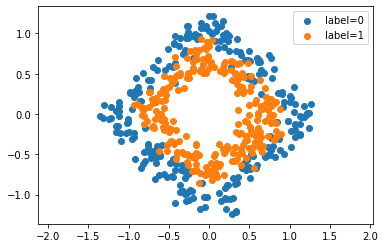

In [9]:
x,y = make_diamonds(n_samples=500, noise=0.1)

for label in [0,1]:
    plt.scatter(x[y==label,0], x[y==label,1], label=f'label={label}')
    
plt.legend()
plt.axis('equal')
plt.show()

We will evaluate classifiers (i.e. functions which take in an input $\boldsymbol{x}\in \mathbb{R}^2$ and return a label $y\in \{0,1\}$) of the following form:

$$
C_{t,p}(\boldsymbol{x}) = \begin{cases}1 &\text{if }\|\boldsymbol{x}\|_p \leq t\\ 0 &\text{if }\|\boldsymbol{x}\|_p>t \end{cases}
$$

where here $\|\boldsymbol{x}\|_p = (|x_1|^p + |x_2|^p)^{1/p}$ is the $p$-norm in 2-dimensions.

Your goal is to find values of $p$ and $t$ that yield the smallest misclassification rate, which is given by

$$
\text{Misclassification Rate} = \frac{1}{n}\sum_{i=1}^n \mathbb{1}(C_{t,p}(\boldsymbol{x}_i)\neq y_i).
$$

To do this, evaluate the misclasssification rate of the classifier $C_{t,p}$ for $p=1,2,\infty$ and $t = 0.1,0.15,0.2,\dots, 1.5$. For each value of $p$, plot the misclassification rate of the classifier $C_{t,p}$ as a function of $t$. Which $p$-norm attains the lowest misclassification rate, and at what value of $t$? Explain why your answer makes sense, given the structure of the data. (For this problem, you can use the same dataset generated above, with `n_samples=500` and `noise=0.1`).

In [11]:
def C_tp(x, t, p):
    return int(np.linalg.norm(x, ord=p) <= t)

def error(y, y_pred):
    return np.mean(y!=y_pred)

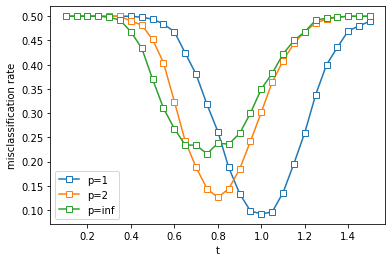

In [13]:
import matplotlib.pyplot as plt

t_range = np.arange(0.1,1.55,0.05)
for p in [1,2,np.inf]:
    errors = []
    for t in t_range:
        y_pred = [C_tp(xi, t, p) for xi in x]
        errors.append(error(y,y_pred))
    plt.plot(t_range, errors, marker='s', markerfacecolor='white', label=f'p={p}')
    
plt.xlabel('t')
plt.ylabel('misclassification rate')
plt.legend()
plt.show() ## the 1-norm is the best, with t approximately equal to 1

## Problem 2: changing bases

Typically, when we write a vector $\boldsymbol{x} = (x_1, x_2)$ in $\mathbb{R}^2$, we are implicitly representing this vector with respect to the standard basis $\boldsymbol{e}_1 = (1,0),\;\;\; \boldsymbol{e}_2 = (0,1).$
This is because we have the relation $\boldsymbol{x} = x_1 \boldsymbol{e}_1 + x_2 \boldsymbol{e}_2$. However, this is not the only way that we can represent this same vector. Given any two vectors $\boldsymbol{u} = (u_1, u_2)$ and $\boldsymbol{v} = (v_1, v_2)$ which form a basis for $\mathbb{R}^2$, there exist scalars $\alpha, \beta$ such that $\boldsymbol{x} = \alpha \boldsymbol{u} + \beta \boldsymbol{v}.$ 
The vector $(\alpha,\beta)$ are called the _coordinates of $\boldsymbol{x}$ with respect to the basis_ $\{\boldsymbol{u},\boldsymbol{v}\}$. Given the vectors $\boldsymbol{u},\boldsymbol{v}$ and the representation of $\boldsymbol{x}$ with repsect to the standard basis $(x_1,x_2)$, there is a formula we can use to find $(\alpha,\beta)$:

$$
\alpha = \frac{x_1v_2 - x_2v_1}{u_1v_2 - v_1u_2},\;\;\; \beta = \frac{x_2u_1 - x_1u_2}{u_1v_2 - v_1u_2}
$$


### Part A
Write a Python function `change_of_basis(x,u,v)` which takes in a vector $\boldsymbol{x}=(x_1,x_2)$ represented in the standard basis and basis vectors $\boldsymbol{u}=(u_1,u_2), \boldsymbol{v}= (v_1,v_2)$ and returns the coordinates $(\alpha,\beta)$ of $\boldsymbol{x}$ with respect to the basis $\{\boldsymbol{u},\boldsymbol{v}\}$.

In [3]:
import numpy as np
def change_of_basis(x,u,v):
    alpha = (x[0]*v[1] - x[1]*v[0])/(u[0]*v[1] - v[0]*u[1])
    beta = (x[1]*u[0]-x[0]*u[1])/(u[0]*v[1] - v[0]*u[1])
    return alpha,beta

### Part B
Using your function `change_of_basis`, compute the coordinates $(\alpha,\beta)$ of $\boldsymbol{x} = (-2, 4)$ with respect to the basis $\boldsymbol{u} = (2, 0)$, $\boldsymbol{v}=(0,.5)$. Verify that $\boldsymbol{x} = \alpha \boldsymbol{u} + \beta \boldsymbol{v}$. How do $\alpha$ and $\beta$ relate to the coordinates of $\boldsymbol{x}$ with repsect to the standard basis?

In [4]:
u = np.array([2,0])
v = np.array([0,.5])
x = np.array([-2,4])
alpha,beta = change_of_basis(x, u, v)
print(alpha*u + beta*v)

[-2.  4.]


### Part C
Using your function `change_of_basis`, compute the coordinates $(\alpha,\beta)$ of $\boldsymbol{x} = (-2, 4)$ with respect to the basis $\boldsymbol{u} = (2, 1)$, $\boldsymbol{v}=(1,1)$. Verify that $x = \alpha \boldsymbol{u} + \beta \boldsymbol{v}$. Is your interpretation of $\alpha$ and $\beta$ different from that of part B?

In [5]:
u = np.array([2,1])
v = np.array([1,1])
x = np.array([-2,4])
alpha,beta = change_of_basis(x, u, v)
print(alpha*u + beta*v)

[-2.  4.]


### Part D
Try using your function `change_of_basis` to compute the coordinates $(\alpha,\beta)$ of $\boldsymbol{x} = (-2, 4)$ with respect to the vectors $\boldsymbol{u} = (1, 1)$, $\boldsymbol{v}=(2,2)$. You should observe that your function gives an error, or doesn't return a valid value. Why is this?

In [7]:
u = np.array([1,1])
v = np.array([2,2])
x = np.array([-2,4])
alpha,beta = change_of_basis(x, u, v)
print(alpha*u + beta*v) #not linearly independent

[nan nan]


<ipython-input-3-2427fdd2f13b>:3: RuntimeWarning: divide by zero encountered in long_scalars
  alpha = (x[0]*v[1] - x[1]*v[0])/(u[0]*v[1] - v[0]*u[1])
<ipython-input-3-2427fdd2f13b>:4: RuntimeWarning: divide by zero encountered in long_scalars
  beta = (x[1]*u[0]-x[0]*u[1])/(u[0]*v[1] - v[0]*u[1])
<ipython-input-7-89adcdbd25a6>:5: RuntimeWarning: invalid value encountered in add
  print(alpha*u + beta*v) #not linearly independent
